In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train_v9rqX0R.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
c=df.corr()
c

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


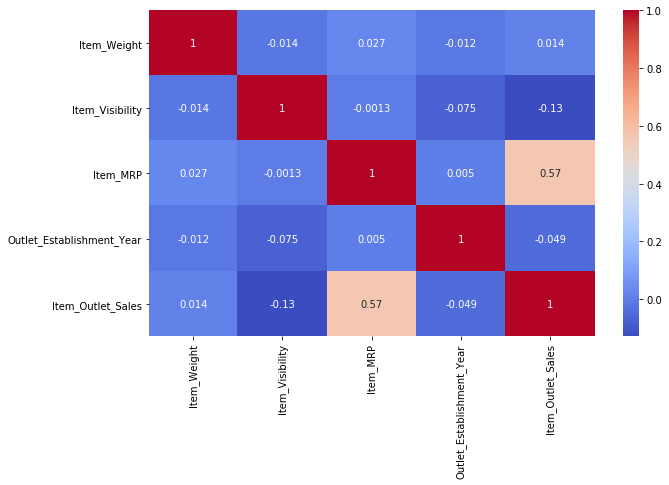

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(c,cmap='coolwarm',annot=True)

In [6]:
df.shape

(8523, 12)

In [7]:
df.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df.groupby('Outlet_Establishment_Year').Item_Outlet_Sales.sum()

Outlet_Establishment_Year
1985    3.633620e+06
1987    2.142664e+06
1997    2.118395e+06
1998    1.883402e+05
1999    2.183970e+06
2002    2.036725e+06
2004    2.268123e+06
2007    2.167465e+06
2009    1.851823e+06
Name: Item_Outlet_Sales, dtype: float64

In [10]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [11]:
#df.replace({'Outlet_Establishment_Year': { 1985:9, 1987:8, 1997:7, 1998:6, 1999:5, 2002:4, 2004:3, 2007:2, 2009:1 }},inplace=True) 

In [12]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [13]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [14]:
def Ifc(item):
    if item.lower()=='low fat' or item.lower()=='lf':
        return 'Low Fat'
    else:
        return 'Regular'

In [15]:
fat=df['Item_Fat_Content'].apply(Ifc)
df['fat']=fat
df.drop('Item_Fat_Content', inplace=True,axis=1)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,fat
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Low Fat
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Regular
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Low Fat
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Regular
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Low Fat


In [16]:
df=df.join(pd.get_dummies(df['fat'],prefix='fat'))
df.drop('fat', inplace=True,axis=1)

In [17]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [18]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [19]:
item_10=[x for x in df['Item_Type'].value_counts().sort_values(ascending=False).head(10).index]

In [20]:
for x in item_10:
    df[x]=np.where(df['Item_Type']==x,1,0)

In [21]:
df[['Item_Type']+item_10].head()

,Item_Type,Fruits and Vegetables,Snack Foods,Household,Frozen Foods,Dairy,Canned,Baking Goods,Health and Hygiene,Soft Drinks,Meat
0,Dairy,0,0,0,0,1,0,0,0,0,0
1,Soft Drinks,0,0,0,0,0,0,0,0,1,0
2,Meat,0,0,0,0,0,0,0,0,0,1
3,Fruits and Vegetables,1,0,0,0,0,0,0,0,0,0
4,Household,0,0,1,0,0,0,0,0,0,0


In [22]:
df.drop('Item_Type',axis=1,inplace=True)

In [23]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [24]:
def size(item):
    if item=='High':
        return 3
    if item=='Medium':
        return 2
    if item=='Small':
        return 1
    else:
        return 0

In [25]:
df['new_size']=df['Outlet_Size'].apply(size)

In [26]:
df.drop('Outlet_Size', inplace=True,axis=1)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,fat_Low Fat,...,Snack Foods,Household,Frozen Foods,Dairy,Canned,Baking Goods,Health and Hygiene,Soft Drinks,Meat,new_size
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,1,...,0,0,0,1,0,0,0,0,0,2
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,0,...,0,0,0,0,0,0,0,1,0,2
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,1,...,0,0,0,0,0,0,0,0,1,2
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,0,...,0,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,1,...,0,1,0,0,0,0,0,0,0,3


In [27]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [28]:
def Location(item):
    if item=='Tier 1':
        return 3
    if item=='Tier 2':
        return 2
    if item=='Tier 3':
        return 1

In [29]:
df=df.join(pd.get_dummies(df['Outlet_Location_Type']))
#df['Outlet_Location_Type'].apply(Location)

In [30]:
df.drop('Outlet_Location_Type', inplace=True,axis=1)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,fat_Low Fat,fat_Regular,...,Dairy,Canned,Baking Goods,Health and Hygiene,Soft Drinks,Meat,new_size,Tier 1,Tier 2,Tier 3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,Supermarket Type1,3735.1380,1,0,...,1,0,0,0,0,0,2,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,Supermarket Type2,443.4228,0,1,...,0,0,0,0,1,0,2,0,0,1
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,Supermarket Type1,2097.2700,1,0,...,0,0,0,0,0,1,2,1,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,Grocery Store,732.3800,0,1,...,0,0,0,0,0,0,0,0,0,1
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,Supermarket Type1,994.7052,1,0,...,0,0,0,0,0,0,3,0,0,1


In [31]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [32]:
pd.get_dummies(df['Outlet_Type'])

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
8518,0,1,0,0
8519,0,1,0,0
8520,0,1,0,0
8521,0,0,1,0


In [33]:
df=df.join(pd.get_dummies(df['Outlet_Type']))

In [34]:
df.drop('Outlet_Type', inplace=True,axis=1)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,fat_Low Fat,fat_Regular,Fruits and Vegetables,...,Soft Drinks,Meat,new_size,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,1,0,0,...,0,0,2,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,0,1,0,...,1,0,2,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,1,0,0,...,0,1,2,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,732.3800,0,1,1,...,0,0,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,1,0,0,...,0,0,3,0,0,1,0,1,0,0


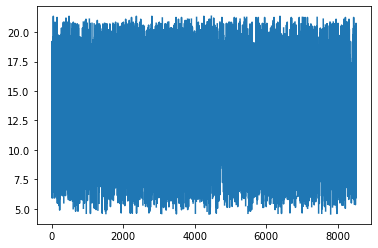

In [35]:
df['Item_Weight'].plot()

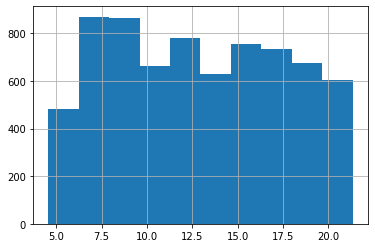

In [36]:
df['Item_Weight'].hist()

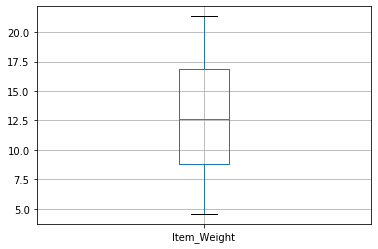

In [37]:
df.boxplot(['Item_Weight'])

In [38]:
df[df['Item_Weight'].isnull()==True]

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,fat_Low Fat,fat_Regular,Fruits and Vegetables,...,Soft Drinks,Meat,new_size,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
7,FDP10,NaN,0.127470,107.7622,OUT027,1985,4022.7636,1,0,0,...,0,0,2,0,0,1,0,0,0,1
18,DRI11,NaN,0.034238,113.2834,OUT027,1985,2303.6680,1,0,0,...,0,0,2,0,0,1,0,0,0,1
21,FDW12,NaN,0.035400,144.5444,OUT027,1985,4064.0432,0,1,0,...,0,0,2,0,0,1,0,0,0,1
23,FDC37,NaN,0.057557,107.6938,OUT019,1985,214.3876,1,0,0,...,0,0,1,1,0,0,1,0,0,0
29,FDC14,NaN,0.072222,43.6454,OUT019,1985,125.8362,0,1,0,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,0.043792,189.0530,OUT027,1985,6261.8490,1,0,0,...,1,0,2,0,0,1,0,0,0,1
8487,DRG13,NaN,0.037006,164.7526,OUT027,1985,4111.3150,1,0,0,...,1,0,2,0,0,1,0,0,0,1
8488,NCN14,NaN,0.091473,184.6608,OUT027,1985,2756.4120,1,0,0,...,0,0,2,0,0,1,0,0,0,1
8490,FDU44,NaN,0.102296,162.3552,OUT019,1985,487.3656,0,1,1,...,0,0,1,1,0,0,1,0,0,0


In [39]:
df['Item_Weight'].mean()

12.857645184136183

In [40]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True) 

In [41]:
df['Item_Weight'].isnull().any()

False

In [42]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'fat_Low Fat', 'fat_Regular', 'Fruits and Vegetables', 'Snack Foods',
       'Household', 'Frozen Foods', 'Dairy', 'Canned', 'Baking Goods',
       'Health and Hygiene', 'Soft Drinks', 'Meat', 'new_size', 'Tier 1',
       'Tier 2', 'Tier 3', 'Grocery Store', 'Supermarket Type1',
       'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [43]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,fat_Low Fat,fat_Regular,Fruits and Vegetables,...,Soft Drinks,Meat,new_size,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,1,0,0,...,0,0,2,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,0,1,0,...,1,0,2,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,1,0,0,...,0,1,2,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,732.3800,0,1,1,...,0,0,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,1,0,0,...,0,0,3,0,0,1,0,1,0,0


In [44]:
features=['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year','fat_Low Fat','fat_Regular',
          'new_size','Tier 1','Tier 2','Tier 3','Grocery Store', 'Supermarket Type1','Supermarket Type2',
          'Supermarket Type3','Fruits and Vegetables', 'Snack Foods','Household', 'Frozen Foods',
          'Dairy', 'Canned', 'Baking Goods','Health and Hygiene', 'Soft Drinks', 'Meat']

In [45]:
from sklearn.model_selection import train_test_split
X=df[features]
y=df['Item_Outlet_Sales']

In [46]:
jgrjnng

NameError: name 'jgrjnng' is not defined

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

In [49]:
def raf(n):
    rf=RandomForestRegressor(n_estimators=n,random_state=101)
    rf.fit(X_train,y_train)
    pred=rf.predict(X_test)
    return[mean_absolute_error(y_test,pred),sqrt(mean_squared_error(y_test,pred))]

In [50]:
from xgboost import XGBRegressor

In [86]:
xg = XGBRegressor(learning_rate=0.05)
xg.fit(X_train,y_train)
pred=xg.predict(X_test)

[03:48:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [88]:
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))
print(sqrt(mean_squared_error(y_test,pred)))

723.9976254196961
1043950.1305305426
1021.7387780301492


In [89]:
df_test_1=pd.read_csv('test_AbJTz2l.csv')
df_test=df_test_1

In [90]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [91]:
df_test.Outlet_Establishment_Year.unique()

array([1999, 2007, 1998, 1985, 1997, 2009, 2002, 1987, 2004])

In [92]:
#df_test.replace({'Outlet_Establishment_Year': { 1985:9, 1987:8, 1997:7, 1998:6, 1999:5, 2002:4, 2004:3, 2007:2, 2009:1 }}) 
df_test['fat']=df_test['Item_Fat_Content'].apply(Ifc)
df_test=df_test.join(pd.get_dummies(df_test['fat'],prefix='fat'))
df_test['new_size']=df_test['Outlet_Size'].apply(size)
df_test=df_test.join(pd.get_dummies(df_test['Outlet_Type']))
df_test=df_test.join(pd.get_dummies(df_test['Outlet_Location_Type']))
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace = True) 
item_10=[x for x in df_test['Item_Type'].value_counts().sort_values(ascending=False).head(10).index]
for x in item_10:
    df_test[x]=np.where(df_test['Item_Type']==x,1,0)
df[features].head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,fat_Low Fat,fat_Regular,new_size,Tier 1,Tier 2,Tier 3,...,Fruits and Vegetables,Snack Foods,Household,Frozen Foods,Dairy,Canned,Baking Goods,Health and Hygiene,Soft Drinks,Meat
0,9.30,0.016047,249.8092,1999,1,0,2,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5.92,0.019278,48.2692,2009,0,1,2,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,1999,1,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,1998,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1987,1,0,3,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [93]:
final=xg.predict(df_test[features])

In [94]:
output = pd.DataFrame({'Item_Identifier': df_test_1.Item_Identifier,
                       'Outlet_Identifier': df_test_1.Outlet_Identifier,
                      'Item_Outlet_Sales':final})

In [95]:
output[output['Item_Outlet_Sales']<0]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales


In [96]:
output.to_csv('submission.csv', index=False)

In [97]:
output

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1625.215088
1,FDW14,OUT017,1409.938232
2,NCN55,OUT010,603.346375
3,FDQ58,OUT017,2532.478271
4,FDY38,OUT027,5827.407227
...,...,...,...
5676,FDB58,OUT046,2108.526855
5677,FDD47,OUT018,2360.755127
5678,NCO17,OUT045,1880.904053
5679,FDJ26,OUT017,3513.804932
